In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1 Tiền xử lý dữ liệu

In [272]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


### Bỏ đi những cột không cần thiết

In [273]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

Ta chỉ xét những giá nhà dưới 10 triệu và diện tích dưới 150 nên sẽ bỏ đi những dòng không đáp ứng điều kiện

In [274]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 150].index, inplace = True)


### Tạo thêm đặc trưng cho bảng dữ liệu 
> Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [275]:
def isWholeHouse(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nguyên']
    df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [276]:
def isLiveTogether(df):
    df["Title"] = df["Title"].str.lower()
    e = ['ghép','share',"ktx",'túc']
    df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [277]:
def isApartment(df):
    df["Title"] = df["Title"].str.lower()
    e = ['hộ','cư', 'chdv']
    df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [278]:
def isNew(df):
    df["Title"] = df["Title"].str.lower()
    e = ['mới', 'vừa', 'xây']
    df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [279]:
def isNearCenter(df):
    df["Title"] = df["Title"].str.lower()
    e = ['tâm', 'tam']
    df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [280]:
def hasFurniture(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nội thất', 'noi that', 'tiện nghi','tiện ích']
    df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [281]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [282]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [283]:
train_df_temp.shape

(1111, 11)

### Xác định biến Categorical/Numeric

In [284]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1138
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1111 non-null   int64  
 1   Title               1111 non-null   object 
 2   Price(Triệu/tháng)  1111 non-null   float64
 3   Square(m²)          1111 non-null   float64
 4   District            1111 non-null   object 
 5   isNew               1111 non-null   object 
 6   isNearCenter        1111 non-null   object 
 7   hasFurniture        1111 non-null   object 
 8   isWholeHouse        1111 non-null   object 
 9   isLiveTogether      1111 non-null   object 
 10  isApartment         1111 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 104.2+ KB


In [285]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

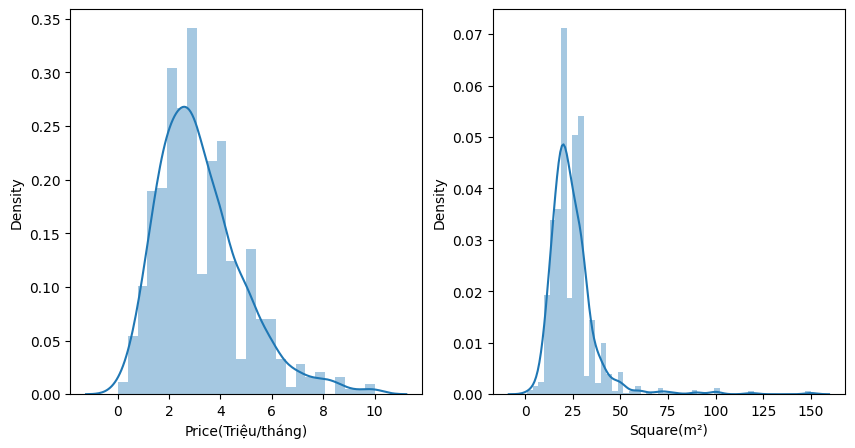

In [286]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [287]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)


In [288]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.107000e+03,1107.000000,1107.000000
mean,1.509529e+06,3.220874,24.296793
std,3.360572e+05,1.673107,11.172273
min,4.783240e+05,0.000000,1.000000
25%,1.443659e+06,2.000000,18.000000
50%,1.561907e+06,3.000000,22.000000
75%,1.740762e+06,4.000000,30.000000
max,2.127970e+06,10.000000,100.000000


### Loại bỏ outliers

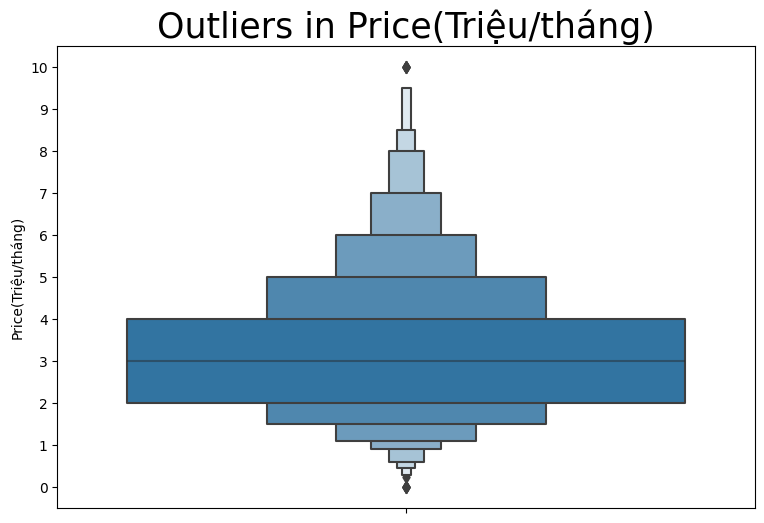

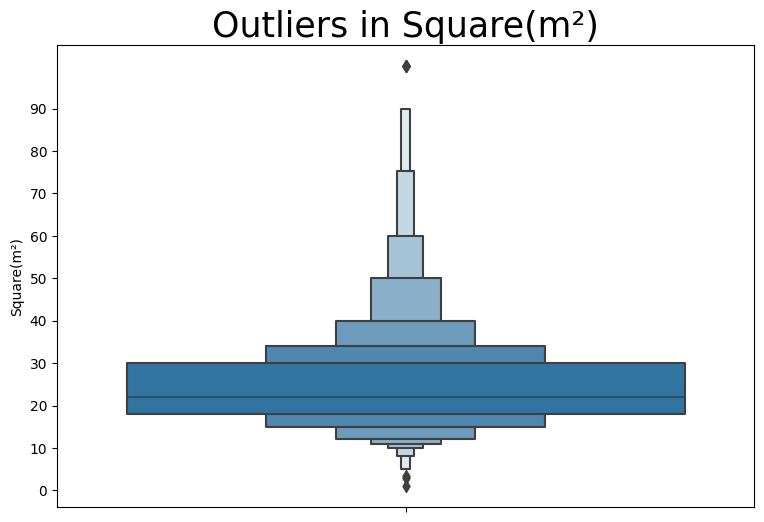

In [289]:
for col in num_vars:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=train_df_temp)
    plt.title('Outliers in {}'.format(col),fontsize=25,fontweight=5)
    if col == 'Price(Triệu/tháng)':
        plt.yticks(range(0,11,1))
    if col == 'Square(m²)':
        plt.yticks(range(0,100,10))
    plt.show()

Outliers ở giá nằm ở mức gần 10 triệu, ở diện tích nằm ở mức gần 100 và nằm dưới 5, ta sẽ loại những giá trị này để tránh ảnh hưởng

In [290]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 9.7].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 95].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] < 5].index, inplace = True)

## 2 Chọn các feature để build model

### Ta sẽ Label Encoding các biến category

In [291]:
from sklearn.preprocessing import LabelEncoder

In [292]:
train_df_temp

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
1134,2119311,"cho thuê phòng đẹp 16m2 đường thành thái-q10, ...",5.0,16.0,Quận 10,no,no,no,no,no,no
1135,2122158,thuê phòng 2.5 triệu 20m2 căn bìa tầng trệt gầ...,2.5,20.0,Quận 4,no,no,no,no,no,no
1136,2127186,cho thuê mặt bằng kd và phòng trọ số 36/66 ngu...,2.0,6.0,Bình Thạnh,no,no,no,yes,no,no
1137,2127880,"phòng nội thất cao cấp ưu tiên nữ, gần vòng xo...",2.9,22.0,Tân Phú,no,no,yes,no,no,no


In [293]:
encoder = LabelEncoder()
df_new = train_df_temp
for i in cat_vars:
    df_new[i] = encoder.fit_transform(df_new[i])
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']

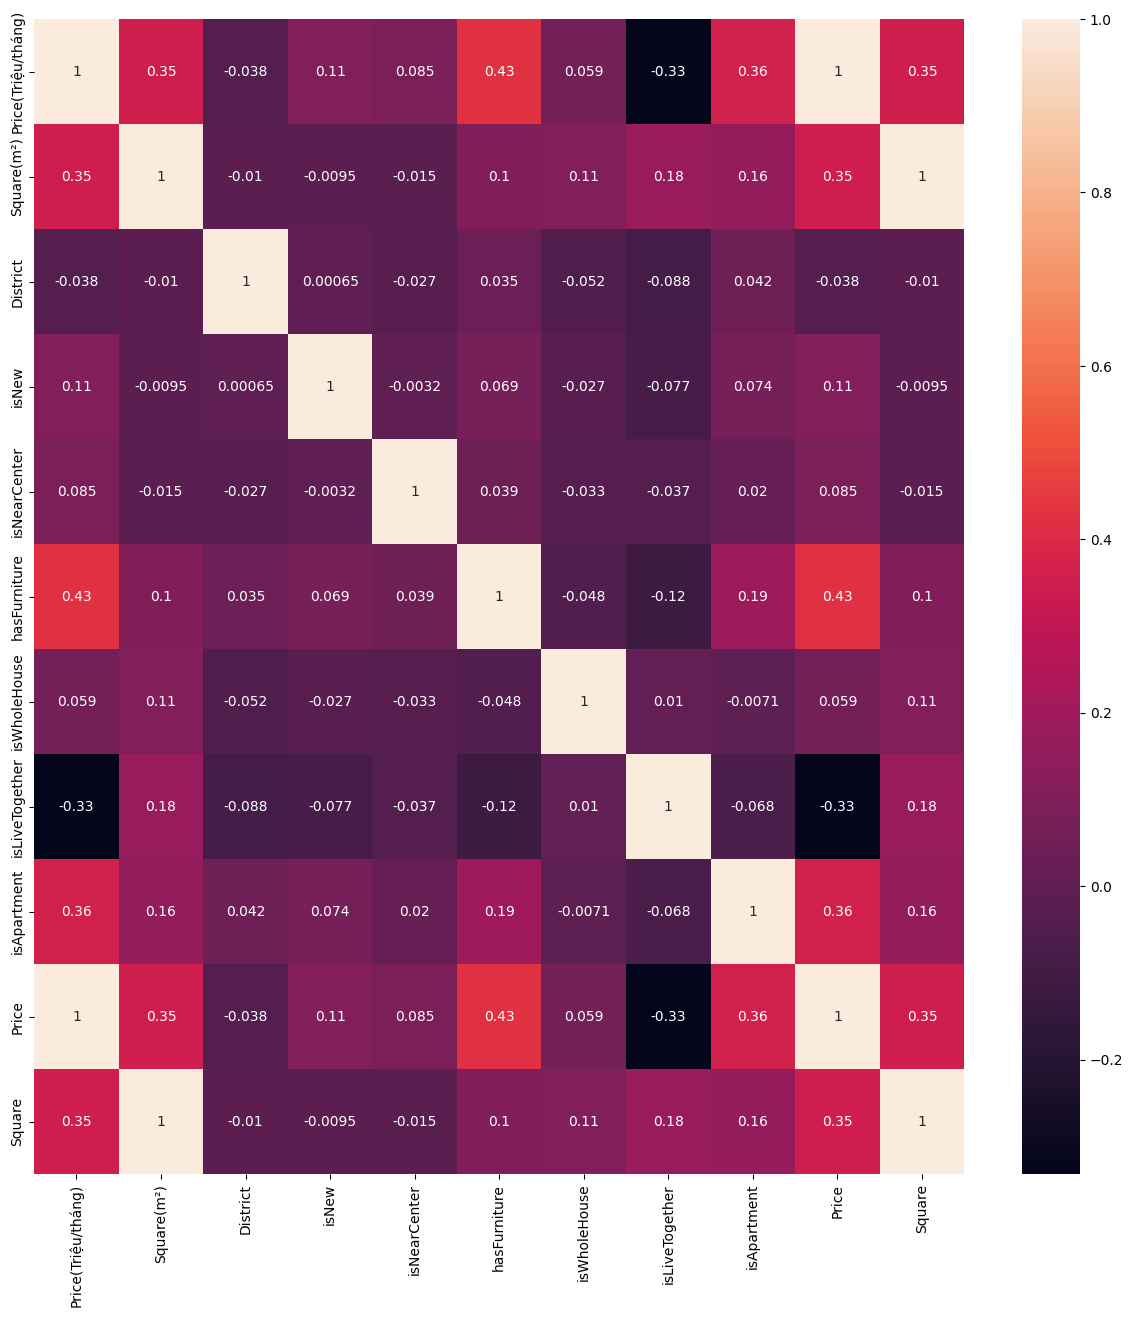

In [294]:
fig= plt.subplots(figsize = (15,15))
sns.heatmap(train_df_temp.drop(columns='Id').corr(),annot=True)
plt.show()

Ta thấy những cột ít có sự ảnh hưởng đến giá nhất là isWholeHouse, isNew, isNearCenter, District, ta sẽ bỏ những thuộc tính này đi

In [295]:
df_new.drop(columns=['isWholeHouse', 'isNew', 'isNearCenter', 'District'],inplace=True)

## 3 Xây dựng model

In [296]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

### Chia các tập train, validation, test

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

### Ta lần lượt tính độ lỗi (MAE) của các mô hình trên tập train và validation để chọn ra các mô hình tốt nhất

In [298]:
model = LinearRegression()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))


Train error (MAE): 0.9221547607612796
Val error (MAE): 0.8518281619866531


In [299]:
model = Ridge()
model.fit(X_train,y_train)
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.9215503450129229
Val error (MAE): 0.8531283359602191


Linear và Ridge có độ lỗi trên tập train và val khá tương đồng nhau

In [300]:
model = Lasso()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 1.1717172610118058
Val error (MAE): 1.1057089850598592


Độ lỗi trên mô hình Lasso là khá lớn nên ta sẽ loại

In [301]:
model = KNeighborsRegressor()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.8872914285714286
Val error (MAE): 0.9211420454545455


KNeighborsRegressor có độ lỗi trên tập train thấp hơn một chút nhưng độ lỗi trên tập val lại cao hơn hẳn -> loại

In [302]:
model = RandomForestRegressor()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.7742575452929462
Val error (MAE): 0.9056555372953173


RandomForestRegressor có độ lỗi trên tập train khá thấp, nhưng độ lỗi trên tập val lại khá cao, ta vẫn sử dụng mô hình này để chạy

======TRAIN======
Train error (MAE): 0.9092938593936782
R2 score : 0.4407843861842715
======TEST======
Test error (MAE): 0.8901007247608148
R2 score : 0.4720565455128479


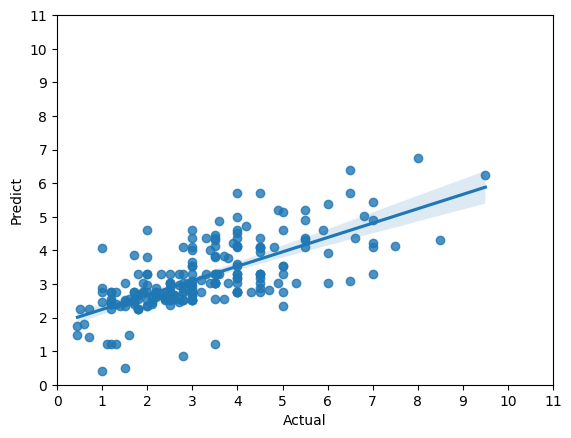

In [303]:
model = LinearRegression()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.9087799535765904
R2 score : 0.44074848980654413
======TEST======
Test error (MAE): 0.8903291777213728
R2 score : 0.4718815291808308


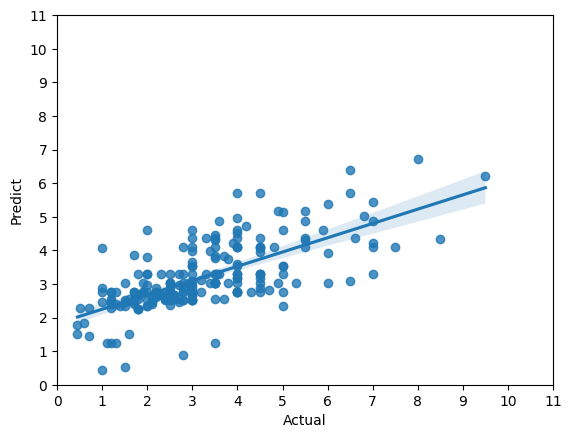

In [304]:
model = Ridge()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.7825745453121457
R2 score : 0.5877948952636918
======TEST======
Test error (MAE): 0.9301689395656847
R2 score : 0.3459210167262531


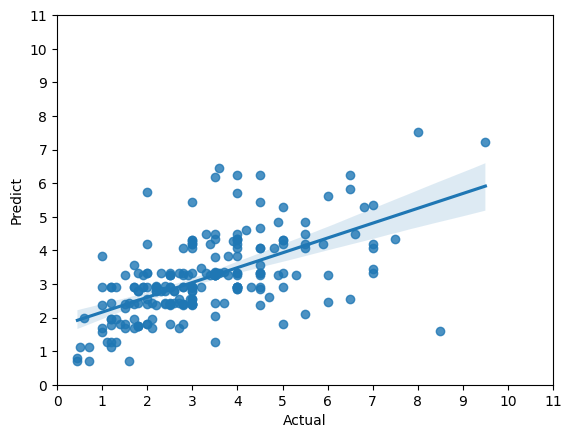

In [305]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy tuy train Linear và Ridge có R2_score thấp cùng độ lỗi cao nhưng khi cho chạy tập test thì lại có kết quả tốt hơn cả train. RandomForestRegressor thì ngược lại, train đưa ra kết quả rất tốt nhưng thực tế lại đưa ra kết quả thấp hơn 2 mô hình kia